In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)  # <1>
t_u = torch.tensor(t_u).unsqueeze(1)  # <1>

t_u.shape

torch.Size([11, 1])

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 3,  7,  2,  0,  6,  5,  4,  1, 10]), tensor([9, 8]))

In [4]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [5]:
import torch.nn as nn

linear_model = nn.Linear(1, 1)  # <1>
linear_model(t_un_val)

tensor([[-1.0792],
        [-0.8794]], grad_fn=<AddmmBackward0>)

In [6]:
linear_model.weight

Parameter containing:
tensor([[-0.1665]], requires_grad=True)

In [7]:
linear_model.bias

Parameter containing:
tensor([-0.0737], requires_grad=True)

In [8]:
x = torch.ones(1)
linear_model(x)

tensor([-0.2402], grad_fn=<ViewBackward0>)

In [9]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.2402],
        [-0.2402],
        [-0.2402],
        [-0.2402],
        [-0.2402],
        [-0.2402],
        [-0.2402],
        [-0.2402],
        [-0.2402],
        [-0.2402]], grad_fn=<AddmmBackward0>)

In [10]:
linear_model = nn.Linear(1, 1)  # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)  # <2>

In [11]:
linear_model.parameters()

<generator object Module.parameters at 0x7a58f26d3ae0>

In [12]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.2633]], requires_grad=True),
 Parameter containing:
 tensor([-0.5728], requires_grad=True)]

In [13]:
def training_loop(
    n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val
):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)  # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)  # <1>
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()  # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(
                f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                f" Validation loss {loss_val.item():.4f}"
            )

In [14]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()


linear_model = nn.Linear(1, 1)  # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=loss_fn,
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val,
)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 287.0752, Validation loss 165.0821
Epoch 1000, Training loss 2.5636, Validation loss 9.5354
Epoch 2000, Training loss 2.0064, Validation loss 8.8178
Epoch 3000, Training loss 1.9966, Validation loss 8.7310

Parameter containing:
tensor([[5.4038]], requires_grad=True)
Parameter containing:
tensor([-16.9532], requires_grad=True)


In [15]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.MSELoss(),  # <1>
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val,
)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 146.5968, Validation loss 61.6279
Epoch 1000, Training loss 2.4859, Validation loss 9.4725
Epoch 2000, Training loss 2.0050, Validation loss 8.8107
Epoch 3000, Training loss 1.9966, Validation loss 8.7300

Parameter containing:
tensor([[5.4043]], requires_grad=True)
Parameter containing:
tensor([-16.9561], requires_grad=True)


In [16]:
seq_model = nn.Sequential(nn.Linear(1, 13), nn.Tanh(), nn.Linear(13, 1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [20]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [22]:
for name, params in seq_model.named_parameters():
    print(name, params)

0.weight Parameter containing:
tensor([[-0.3033],
        [ 0.0136],
        [-0.5270],
        [ 0.1332],
        [-0.0681],
        [-0.5348],
        [ 0.6096],
        [ 0.3159],
        [ 0.5816],
        [ 0.7558],
        [-0.1304],
        [-0.5501],
        [ 0.7960]], requires_grad=True)
0.bias Parameter containing:
tensor([-2.9872e-01, -3.4618e-02, -1.7079e-01,  8.0783e-01,  3.0606e-01,
         6.0137e-01,  8.6287e-01,  2.7178e-01,  4.6005e-01,  3.7920e-04,
        -9.6139e-01,  3.0545e-01, -5.2407e-01], requires_grad=True)
2.weight Parameter containing:
tensor([[ 0.2392, -0.0815, -0.2354,  0.0789, -0.1581, -0.0588, -0.2349,
         -0.2736, -0.2714,  0.1752, -0.1996, -0.2650,  0.0173]],
       requires_grad=True)
2.bias Parameter containing:
tensor([-0.2305], requires_grad=True)


In [25]:
from collections import OrderedDict

seq_model = nn.Sequential(
    OrderedDict(
        [
            ("hidden_linear", nn.Linear(1, 8)),
            ("hidden_activation", nn.Tanh()),
            ("output_linear", nn.Linear(8, 1)),
        ]
    )
)

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [26]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [27]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.1887], requires_grad=True)

In [28]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val,
)

print("output", seq_model(t_un_val))
print("answer", t_c_val)
print("hidden", seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 191.3686, Validation loss 89.2892
Epoch 1000, Training loss 4.6728, Validation loss 9.3426
Epoch 2000, Training loss 2.9061, Validation loss 15.7063
Epoch 3000, Training loss 1.6911, Validation loss 9.9747
Epoch 4000, Training loss 1.4167, Validation loss 7.7463
Epoch 5000, Training loss 1.3665, Validation loss 7.1365
output tensor([[15.3564],
        [ 7.8308]], grad_fn=<AddmmBackward0>)
answer tensor([[13.],
        [ 6.]])
hidden tensor([[-1.0868],
        [-4.5323],
        [ 0.0222],
        [-7.2612],
        [ 7.7892],
        [-0.2187],
        [-1.2593],
        [-9.0097]])


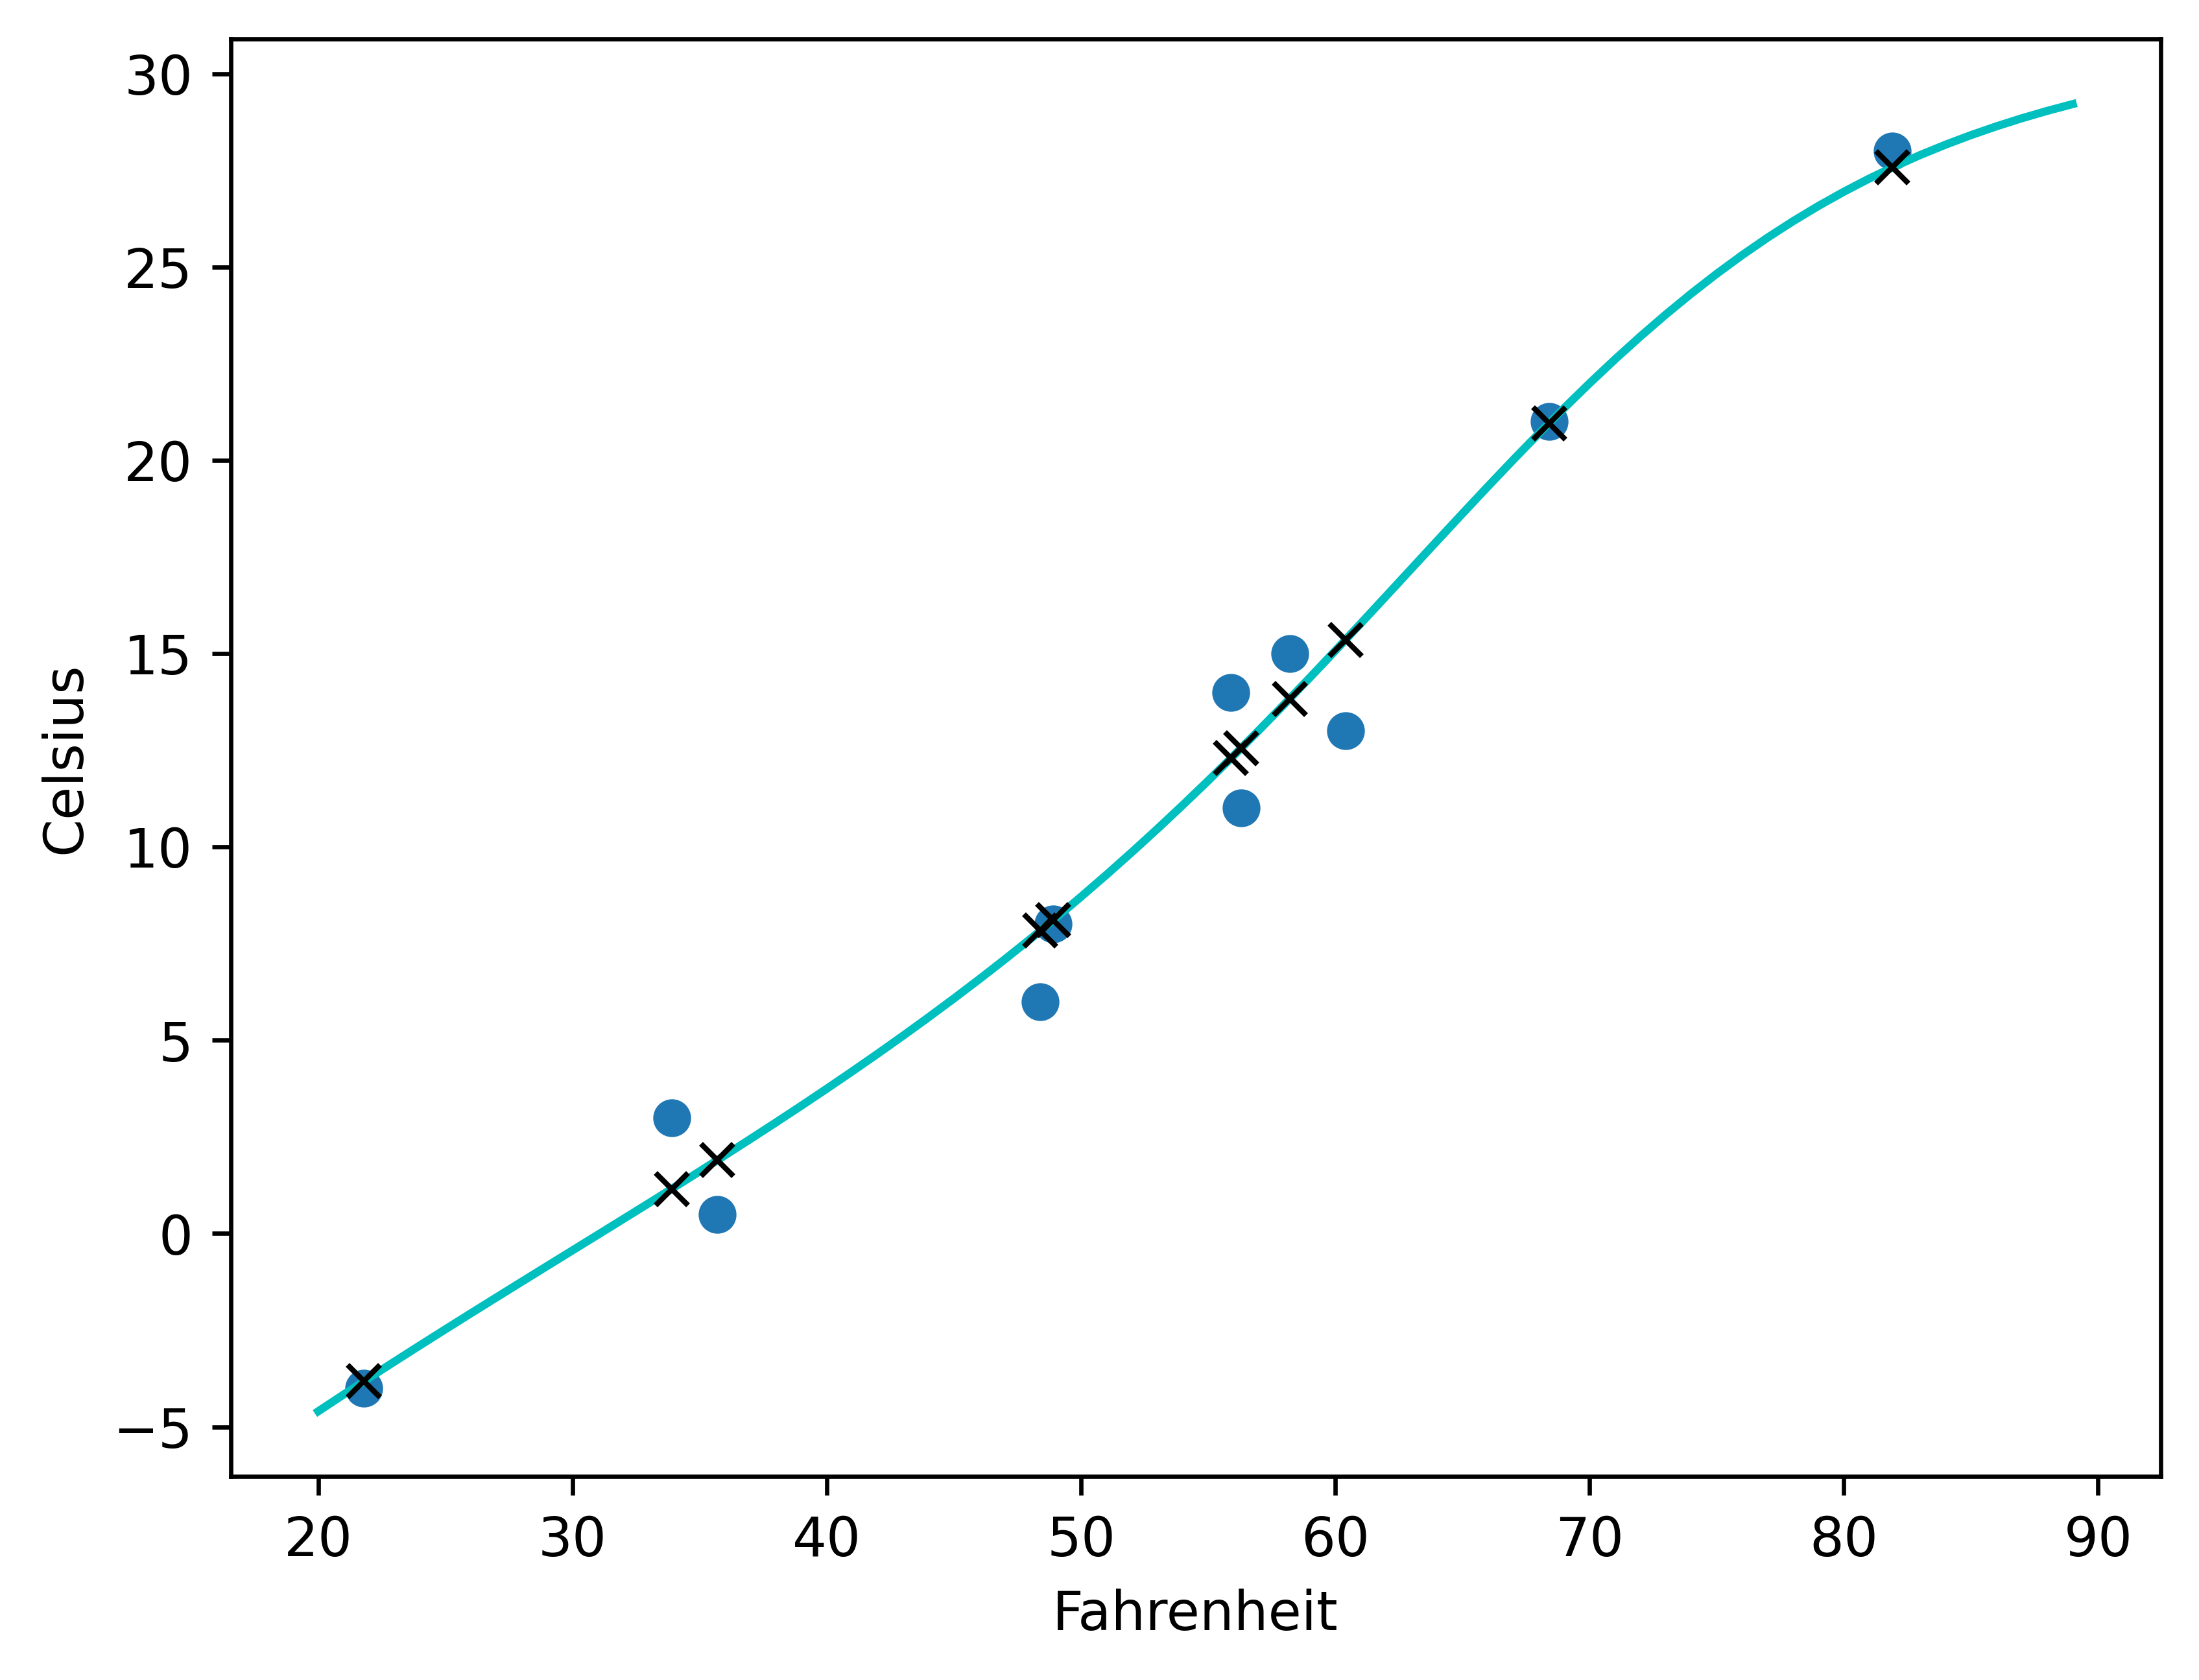

In [29]:
from matplotlib import pyplot as plt

t_range = torch.arange(20.0, 90.0).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), "kx")

Epoch 1, Training loss 204.2582, Validation loss 100.1781
Epoch 1000, Training loss 2.4586, Validation loss 8.8501
Epoch 2000, Training loss 1.5355, Validation loss 7.1176
Epoch 3000, Training loss 1.3875, Validation loss 6.3916
Epoch 4000, Training loss 1.4876, Validation loss 8.2818
Epoch 5000, Training loss 1.4147, Validation loss 7.4775


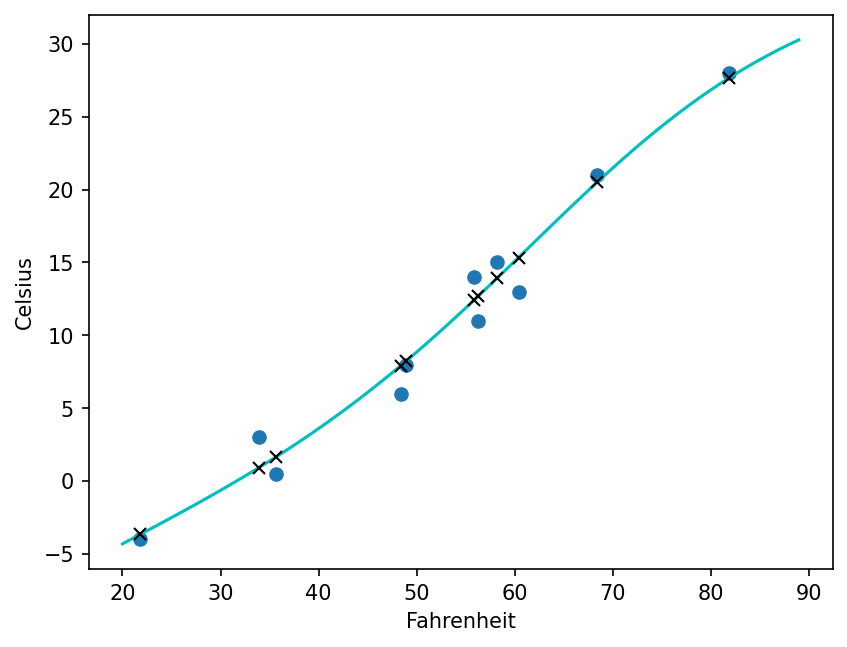

In [36]:
# Exercises here!

neuron_count = 20

seq_model = nn.Sequential(
    OrderedDict(
        [
            ("hidden_linear", nn.Linear(1, neuron_count)),
            ("hidden_activation", nn.Tanh()),
            ("output_linear", nn.Linear(neuron_count, 1)),
        ]
    )
)

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val,
)

from matplotlib import pyplot as plt

t_range = torch.arange(20.0, 90.0).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), "kx")